<a href="https://colab.research.google.com/github/nabaahashimi/food_insecurity_project/blob/main/NabaaProjectMilestone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Insecurity Across U.S. Counties and Census Tracts  
**Author:** Nabaa Al Hashimi  
**Live site:** https://nabaahashimi.github.io/food_insecurity_project/

# Introduction

Food insecurity refers to the limited or uncertain availability of nutritious, affordable food. It does not only describe whether people have food in the moment, but whether they can reliably access healthy food options that support long-term well-being. Across the United States, food insecurity is strongly shaped by structural factors such as neighborhood poverty, access to transportation, distance to supermarkets, and broader socioeconomic conditions. These factors often combine to produce “food deserts,” where residents must travel long distances usually without a personal vehicle to reach a grocery store.

To study these issues at a meaningful level of detail, this project uses census tracts as the primary unit of analysis. A census tract is a small, relatively permanent geographic region defined by the U.S. Census Bureau, typically containing 2,500–8,000 residents. Tracts are designed to represent neighborhoods with similar demographic and socioeconomic characteristics. Census tracts allow for a more precise analysis of community-level differences in income, transportation access, and food availability.

A key metric in this project is the “low-access” population, defined by the USDA Food Access Research Atlas. A resident is considered low-access if they live beyond a reasonable distance from a supermarket:

- Urban tracts: more than 1 mile from a supermarket  
- Rural tracts: more than 10 miles from a supermarket  

Understanding food insecurity from a data science perspective requires integrating multiple sources of information. By combining tract-level measures (such as low-access populations, low-income rates, and vehicle availability) with county-level socioeconomic indicators (such as poverty rates, SNAP participation, and unemployment), we can explore how geographic, demographic, and economic factors interact to shape food availability across the country.

The project focuses on the following research questions:

- **Q1:** How is census-tract or county-level food insecurity distributed across the United States, and what does the variation in its distribution reveal about geographic inequality?
- **Q2:** What is the relationship between structural food-access barriers and food insecurity at the county level?  
- **Q3:** How do socioeconomic and geographic factors shape food insecurity rates across U.S. counties?

Addressing these questions through data cleaning, integration, exploratory analysis, and early modeling will prepare the foundation for building predictive models in the next milestone.

# Data Sources

This project integrates three large public datasets to analyze neighborhood-level food access and broader county-level food insecurity conditions across the United States.

1. USDA Food Access Research Atlas (Census Tract Level)

Unit: Census tract
Source: USDA ERS
Purpose: Measures physical access to supermarkets and identifies low-access populations.
Link: https://www.ers.usda.gov/data-products/food-access-research-atlas/

2. USDA Food Environment Atlas (County Level)

Unit: County
Source: USDA ERS
Purpose: Describes socioeconomic and community factors shaping county-level food security.
Link: https://www.ers.usda.gov/data-products/food-environment-atlas/

3. CDC PLACES (Census Tract & County Level)

Unit: Census tract & county
Source: Centers for Disease Control and Prevention
Purpose: Provides modeled health-related measures for small-area surveillance, including Food Insecurity (Crude Prevalence).
Link: https://www.cdc.gov/places/

Together, the USDA Food Access Atlas, USDA Food Environment Atlas, and CDC PLACES datasets provide tract- and county-level measures of food access, socioeconomic conditions, and modeled food insecurity prevalence to allow for analysis of the structural and geographic factors shaping food insecurity across the U.S.

## ETL: USDA Food Access Research Atlas (Census Tract Level)

In this section, I load and clean the USDA Food Access Research Atlas dataset. This file provides tract-level data on food access, including distance to supermarkets, low-income and low-access measures, vehicle access, and urban/rural classifications.

First I will mount my drive and load the dataset in


In [3]:
# mount google drive to upload datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load in file
fa_path = "drive/My Drive/Food_Access_2019.xlsx"

# Read the sheet that has the data
fa_raw = pd.read_excel(fa_path, sheet_name="Food Access Research Atlas")

# Check the first few rows of data
fa_raw.head()


,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.000000,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.341014,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.000000,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.000000,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.681219,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


Now that I have loaded the correct sheet from the Food Access Research Atlas file, I first inspect the column names. This helps me identify the exact names for tract IDs, population, and low-access variables that I will use in the analysis.

In [5]:
# Show ALL column names to see what's available
fa_raw.columns.tolist()

['CensusTract',
 'State',
 'County',
 'Urban',
 'Pop2010',
 'OHU2010',
 'GroupQuartersFlag',
 'NUMGQTRS',
 'PCTGQTRS',
 'LILATracts_1And10',
 'LILATracts_halfAnd10',
 'LILATracts_1And20',
 'LILATracts_Vehicle',
 'HUNVFlag',
 'LowIncomeTracts',
 'PovertyRate',
 'MedianFamilyIncome',
 'LA1and10',
 'LAhalfand10',
 'LA1and20',
 'LATracts_half',
 'LATracts1',
 'LATracts10',
 'LATracts20',
 'LATractsVehicle_20',
 'LAPOP1_10',
 'LAPOP05_10',
 'LAPOP1_20',
 'LALOWI1_10',
 'LALOWI05_10',
 'LALOWI1_20',
 'lapophalf',
 'lapophalfshare',
 'lalowihalf',
 'lalowihalfshare',
 'lakidshalf',
 'lakidshalfshare',
 'laseniorshalf',
 'laseniorshalfshare',
 'lawhitehalf',
 'lawhitehalfshare',
 'lablackhalf',
 'lablackhalfshare',
 'laasianhalf',
 'laasianhalfshare',
 'lanhopihalf',
 'lanhopihalfshare',
 'laaianhalf',
 'laaianhalfshare',
 'laomultirhalf',
 'laomultirhalfshare',
 'lahisphalf',
 'lahisphalfshare',
 'lahunvhalf',
 'lahunvhalfshare',
 'lasnaphalf',
 'lasnaphalfshare',
 'lapop1',
 'lapop1share',
 

Based on the available columns in this dataset, I select the following core tract-level variables:

- **CensusTract, State, County, Urban:** identifiers and neighborhood context  
- **Pop2010:** total tract population  
- **lapop1, lapop1share:** number and percent of residents with low access at 1 mile (urban) / 10 miles (rural)  
- **lalowi1, lalowi1share:** number and percent of low-income residents with low access  
- **lahunv1, lahunv1share:** number and percent of low-vehicle households with low access

These columns capture the key food-access indicators needed for the project.

In [6]:
# Select the desired variables
fa = fa_raw[[
    "CensusTract",
    "State",
    "County",
    "Urban",
    "Pop2010",

    # Low-access variables
    "lapop1",
    "lapop1share",

    # Low-income low-access
    "lalowi1",
    "lalowi1share",

    # No-vehicle low-access
    "lahunv1",
    "lahunv1share"
]].copy()

fa.head()

,CensusTract,State,County,Urban,Pop2010,lapop1,lapop1share,lalowi1,lalowi1share,lahunv1,lahunv1share
0,1001020100,Alabama,Autauga County,1,1912,1896.493338,99.188982,460.998748,24.110813,5.490446,0.792272
1,1001020200,Alabama,Autauga County,1,2170,1260.991651,58.110214,603.892737,27.829158,66.903537,9.004514
2,1001020300,Alabama,Autauga County,1,3373,1551.703935,46.003674,478.260886,14.179095,0.000000,0.000000
3,1001020400,Alabama,Autauga County,1,4386,1363.466885,31.086796,343.215663,7.825255,7.941380,0.461172
4,1001020500,Alabama,Autauga County,1,10766,2643.095161,24.550392,586.413137,5.446899,55.211883,1.352569


Now, I will standarize data identifiers and data types

This dataset uses FIPS codes to identify geography which is an 11-digit code and the first 5 digits of the tract code are the county FIPS.

In this step I:
- Convert `CensusTract` to an 11-digit zero-padded string.
- Create `county_fips` from the first 5 digits of `CensusTract`.
- Ensure that population and low-access variables are stored as numeric types so they can be used in calculations.


In [7]:
# Make sure CensusTract is a zero-padded 11-character string
fa["CensusTract"] = fa["CensusTract"].astype(str).str.zfill(11)

# Extract the first 5 digits as county FIPS
fa["county_fips"] = fa["CensusTract"].str[:5]

# Columns that should be numeric
num_cols = [
    "Pop2010",
    "lapop1",
    "lapop1share",
    "lalowi1",
    "lalowi1share",
    "lahunv1",
    "lahunv1share"
]

for col in num_cols:
    fa[col] = pd.to_numeric(fa[col], errors="coerce")

fa.dtypes.head(15)

,0
CensusTract,object
State,object
County,object
Urban,int64
Pop2010,int64
lapop1,float64
lapop1share,float64
lalowi1,float64
lalowi1share,float64
lahunv1,float64


Next I will handle missing vlaues:  

- I drop tracts with missing `Pop2010` because population is required to compute rates.
- I fill missing low-access counts (`lapop1`, `lalowi1`, `lahunv1`) with 0.
- I recompute the share variables as counts divided by population to keep them consistent.


In [8]:
# Check missing values before cleaning
fa.isna().sum().sort_values(ascending=False)

,0
lalowi1share,19989
lalowi1,19989
lapop1share,19989
lapop1,19989
lahunv1,19989
lahunv1share,19966
State,0
CensusTract,0
Urban,0
County,0


In [9]:
# Drop tracts with missing population
fa_clean = fa.dropna(subset=["Pop2010"]).copy()

# Fill missing counts with 0
for col in ["lapop1", "lalowi1", "lahunv1"]:
    fa_clean[col] = fa_clean[col].fillna(0)

# Recompute shares cleanly
fa_clean["lapop1share"] = fa_clean["lapop1"] / fa_clean["Pop2010"]
fa_clean["lalowi1share"] = fa_clean["lalowi1"] / fa_clean["Pop2010"]
fa_clean["lahunv1share"] = fa_clean["lahunv1"] / fa_clean["Pop2010"]

fa_clean.isna().sum().sort_values(ascending=False)

,0
CensusTract,0
State,0
County,0
Urban,0
Pop2010,0
lapop1,0
lapop1share,0
lalowi1,0
lalowi1share,0
lahunv1,0


I now create tract-level rate variables that summarize how severe food access barriers are in each tract:

- `low_access_rate`: share of residents with low access
- `low_income_low_access_rate`: share of residents who are low-income and low-access
- `no_vehicle_low_access_rate`: approximate rate of low-access households without vehicles

In [10]:
fa_clean["low_access_rate"] = fa_clean["lapop1"] / fa_clean["Pop2010"]
fa_clean["low_income_low_access_rate"] = fa_clean["lalowi1"] / fa_clean["Pop2010"]
fa_clean["no_vehicle_low_access_rate"] = fa_clean["lahunv1"] / fa_clean["Pop2010"]

#add computed values to table
fa_clean[[
    "CensusTract",
    "county_fips",
    "Pop2010",
    "lapop1",
    "low_access_rate",
    "low_income_low_access_rate",
    "no_vehicle_low_access_rate"
]].head()

,CensusTract,county_fips,Pop2010,lapop1,low_access_rate,low_income_low_access_rate,no_vehicle_low_access_rate
0,01001020100,01001,1912,1896.493338,0.991890,0.241108,0.002872
1,01001020200,01001,2170,1260.991651,0.581102,0.278292,0.030831
2,01001020300,01001,3373,1551.703935,0.460037,0.141791,0.000000
3,01001020400,01001,4386,1363.466885,0.310868,0.078253,0.001811
4,01001020500,01001,10766,2643.095161,0.245504,0.054469,0.005128


The USDA Food Access Research Atlas provides food-access indicators at the census tract level, but the Food Environment Atlas and CDC PLACES datasets operate at the county level. To merge these datasets together, I will aggregate tract-level variables into county-level measures using the `county_fips` identifier (the first five digits of each tract’s FIPS code).

For each county, I compute total population, total low-access residents (residents living far from a supermarket), total low-income low-access residents, total no-vehicle low-access households

I then convert these totals into county-level rates which represent the number of residents in each county facing food access challenges.


In [12]:
# Each row in fa_clean is a census tract, so sum across all tracts in the same county
fa_county = fa_clean.groupby("county_fips").agg(

    # Total county population (sum of tract populations)
    total_pop=("Pop2010", "sum"),

    # Total number of low-access residents (sum of tract-level low-access counts)
    total_low_access=("lapop1", "sum"),

    # Total number of low-income low-access residents
    total_low_income_low_access=("lalowi1", "sum"),

    # Total number of low-access residents without vehicle access
    total_no_vehicle_low_access=("lahunv1", "sum")

).reset_index()

# Percent of the county population that is low-access
fa_county["low_access_rate_county"] = (
    fa_county["total_low_access"] / fa_county["total_pop"]
)

# Percent of the county population that is both low-income and low-access
fa_county["low_income_low_access_rate_county"] = (
    fa_county["total_low_income_low_access"] / fa_county["total_pop"]
)

# Percent of the county population that is low-access and lacks vehicle access
fa_county["no_vehicle_low_access_rate_county"] = (
    fa_county["total_no_vehicle_low_access"] / fa_county["total_pop"]
)

# Display first few county-level rows
fa_county.head()



,county_fips,total_pop,total_low_access,total_low_income_low_access,total_no_vehicle_low_access,low_access_rate_county,low_income_low_access_rate_county,no_vehicle_low_access_rate_county
0,01001,54571,37424.108778,12068.104362,833.360281,0.685787,0.221145,0.015271
1,01003,182265,132441.234727,38842.400894,1655.418161,0.726641,0.213109,0.009082
2,01005,27457,19005.932371,9290.490779,546.730871,0.692207,0.338365,0.019912
3,01007,22915,17559.934924,6479.391594,311.429872,0.766307,0.282758,0.013591
4,01009,57322,50848.320632,18188.154916,752.450353,0.887065,0.317298,0.013127


Now I have `fa_clean` (a cleaned tract-level dataset with standardized FIPS codes, cleaned low-access and low-income measures, and derived tract-level food access rates) and `fa_county` (an aggregated county-level dataset with total population and total low-access counts and county-level food access rates)

These county-level variables will be merged with the Food Environment Atlas later.


ETL on USDA Food Environment Atlas dataset (County Level)

This dataset provides county-level socioeconomic, demographic, and food environment indicators. It will be merged with the county-level version of the Food Access data later.


This dataset provides county-level socioeconomic indicators. This dataset is an Excel workbook, the first step is to identify which sheet contains the county-level data.

In [13]:
 # load in file
fe_path = "drive/My Drive/FoodEnvironmentAtlas.xlsx"

# Check sheet names
xls = pd.ExcelFile(fe_path)
xls.sheet_names

['Read_Me',
 ' Variable List',
 'ACCESS',
 'STORES',
 'RESTAURANTS',
 'ASSISTANCE',
 'INSECURITY',
 'TAXES',
 'LOCAL',
 'HEALTH',
 'SOCIOECONOMIC']

The Food Environment Atlas Excel file contains multiple topic-based sheets. I will use the `SOCIOECONOMIC` sheet because it includes poverty, income, unemployment, and demographic variables at the county level.

In [14]:
# Load the socioeconmic sheet and use the second row (row index 1) as the header
fe_raw = pd.read_excel(fe_path, sheet_name="SOCIOECONOMIC", header=1)

#inspect available variables
fe_raw.columns[:50]

Index(['FIPS', 'State', 'County', 'PCT_NHWHITE20', 'PCT_NHBLACK20',
       'PCT_HISP20', 'PCT_NHASIAN20', 'PCT_NHNA20', 'PCT_NHPI20', 'PCT_NHOR20',
       'PCT_NHTMR20', 'PCT_65OLDER20', 'PCT_18YOUNGER20', 'MEDHHINC21',
       'POVRATE21', 'DEEPPOVRATE21', 'PERPOV17_21', 'CHILDPOVRATE21',
       'DEEPCHILDPOVRATE21', 'METRO23', 'POPLOSS15'],
      dtype='object')

I will now select the variables that correspond to poverty, income, age structure, racial composition, and other socioeconomic indicators.

In [16]:
selected_cols = [
    "FIPS", "State", "County",

    # Racial/ethnic composition
    "PCT_NHWITE20", "PCT_NHBLACK20", "PCT_HISP20",
    "PCT_NHASIAN20", "PCT_NHNA20", "PCT_NHPI20",

    # Age structure
    "PCT_65OLDER20", "PCT_18YOUNGER20",

    # Income & poverty measures
    "MEDHHINC21", "POVRATE21", "CHILDPOVRATE21",
    "DEEPPOVRATE21", "DEEPCHILDPOVRATE21",

    # Metro status + county stability
    "METRO23", "POPLOSS15"
]

# Keep only columns that exist
keep_cols = [c for c in selected_cols if c in fe_raw.columns]
print("Columns kept:", keep_cols)

fe = fe_raw[keep_cols].copy()
fe.head()

Columns kept: ['FIPS', 'State', 'County', 'PCT_NHBLACK20', 'PCT_HISP20', 'PCT_NHASIAN20', 'PCT_NHNA20', 'PCT_NHPI20', 'PCT_65OLDER20', 'PCT_18YOUNGER20', 'MEDHHINC21', 'POVRATE21', 'CHILDPOVRATE21', 'DEEPPOVRATE21', 'DEEPCHILDPOVRATE21', 'METRO23', 'POPLOSS15']


,FIPS,State,County,PCT_NHBLACK20,PCT_HISP20,PCT_NHASIAN20,PCT_NHNA20,PCT_NHPI20,PCT_65OLDER20,PCT_18YOUNGER20,MEDHHINC21,POVRATE21,CHILDPOVRATE21,DEEPPOVRATE21,DEEPCHILDPOVRATE21,METRO23,POPLOSS15
0,1001,AL,Autauga,19.304481,3.600034,1.484568,0.312899,0.037412,15.718051,24.287050,66444,10.7,16.1,6.250216,8.592895,1,0
1,1003,AL,Baldwin,7.766852,5.473601,0.875448,0.557025,0.052639,21.871103,21.269637,65658,10.8,16.4,4.043401,5.503712,1,0
2,1005,AL,Barbour,46.980930,5.986600,0.408357,0.229949,0.000000,20.231535,20.176030,38649,23.0,35.1,12.826966,26.729258,0,0
3,1007,AL,Bibb,19.692280,3.319428,0.116629,0.174943,0.040371,16.220338,21.351994,48454,20.6,29.0,9.076190,17.513135,1,0
4,1009,AL,Blount,1.396828,9.759191,0.294247,0.317922,0.018602,18.625495,23.220144,56894,12.0,16.7,5.291223,6.344746,1,0


Now I will fix the FIPS colmumn like I did above for the first dataset and change the columns to a numeric data type. First I will check the data types then convert them if needed.

In [17]:
# Check the datatypes before cleaning
fe_raw.dtypes

,0
FIPS,int64
State,object
County,object
PCT_NHWHITE20,float64
PCT_NHBLACK20,float64
PCT_HISP20,float64
PCT_NHASIAN20,float64
PCT_NHNA20,float64
PCT_NHPI20,float64
PCT_NHOR20,float64


I convert the county FIPS code into a 5-digit zero-padded string and ensure all socioeconomic variables are stored as numeric values for analysis and merging.

In [18]:
# Convert FIPS to 5-digit zero-padded string
fe_raw["FIPS"] = fe_raw["FIPS"].astype(str).str.zfill(5)

# Convert all other columns (except identifiers) to numeric
fe_clean = fe_raw.copy()
for col in fe_clean.columns:
    if col not in ["FIPS", "State", "County"]:
        fe_clean[col] = pd.to_numeric(fe_clean[col], errors="coerce")

fe_clean.dtypes

,0
FIPS,object
State,object
County,object
PCT_NHWHITE20,float64
PCT_NHBLACK20,float64
PCT_HISP20,float64
PCT_NHASIAN20,float64
PCT_NHNA20,float64
PCT_NHPI20,float64
PCT_NHOR20,float64


Now I will check and then drop counties with missing FIPS codes.

In [19]:
# Check missing values before cleaning
fe_raw.isna().sum().sort_values(ascending=False)

,0
FIPS,0
State,0
County,0
PCT_NHWHITE20,0
PCT_NHBLACK20,0
PCT_HISP20,0
PCT_NHASIAN20,0
PCT_NHNA20,0
PCT_NHPI20,0
PCT_NHOR20,0


Since this dataset contains no missing values, the only required cleaning was converting the FIPS county code into a 5-digit zero-padded string and ensuring all socioeconomic variables are stored as numeric values. Now I can clean up the last dataset

# ETL: CDC PLACES dataset (Census Tract & County Level)
I now load the CSV file from Google Drive into a pandas DataFrame. I begin by reading the raw file and inspecting the first few rows.

In [20]:
cdc_path = "/content/drive/MyDrive/PLACES__Local_Data_for_Better_Health__Census_Tract_Data_2024_release.csv"
cdc = pd.read_csv(cdc_path)

cdc.head()

,Year,StateAbbr,StateDesc,CountyName,CountyFIPS,LocationName,DataSource,Category,Measure,Data_Value_Unit,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,TotalPop18plus,Geolocation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text
0,2022,FL,Florida,Miami-Dade,12086,12086010025,BRFSS,Health Outcomes,Stroke among adults,%,...,5.1,6.1,3992,3091,POINT (-80.254741 25.9664383),12086010025,HLTHOUT,STROKE,CrdPrv,Stroke
1,2022,FL,Florida,Miami-Dade,12086,12086002709,BRFSS,Disability,Vision disability among adults,%,...,2.8,3.4,5273,4706,POINT (-80.1860897 25.793705),12086002709,DISABLT,VISION,CrdPrv,Vision Disability
2,2022,FL,Florida,Miami-Dade,12086,12086007807,BRFSS,Disability,Vision disability among adults,%,...,4.0,4.8,4438,3489,POINT (-80.3102933 25.6755601),12086007807,DISABLT,VISION,CrdPrv,Vision Disability
3,2022,FL,Florida,Miami-Dade,12086,12086001206,BRFSS,Health Status,Frequent physical distress among adults,%,...,8.9,11.2,4835,4065,POINT (-80.1708553 25.864528),12086001206,HLTHSTAT,PHLTH,CrdPrv,Frequent Physical Distress
4,2022,FL,Florida,Miami-Dade,12086,12086010018,BRFSS,Disability,Any disability among adults,%,...,37.3,44.6,3577,2978,POINT (-80.2873705 25.92881),12086010018,DISABLT,DISABILITY,CrdPrv,Any Disability


Now, I inspect the columns to understand how the data are organized. PLACES uses a long format. For each county there are multiple rows, one per health measure. The `Measure` and `Short_Question_Text` columns describe what is being measured, and the `Data_Value` column stores the corresponding percentage estimate.


In [21]:
# Inspect all column names
cdc.columns


Index(['Year', 'StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS',
       'LocationName', 'DataSource', 'Category', 'Measure', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'TotalPopulation', 'TotalPop18plus', 'Geolocation', 'LocationID',
       'CategoryID', 'MeasureId', 'DataValueTypeID', 'Short_Question_Text'],
      dtype='object')

Next, I look at the different categories and measures to see what outcomes are available. The goal is to identify a food-access related measure that can serve as the prediction target.


In [22]:
# High-level categories of measures
cdc['Category'].unique()


array(['Health Outcomes', 'Disability', 'Health Status',
       'Health Risk Behaviors', 'Health-Related Social Needs',
       'Prevention'], dtype=object)

In [41]:
# How many distinct measures are included?
cdc['Measure'].nunique()

40

In [23]:
# look at the first 20 measure names
sorted(cdc['Measure'].unique())[:20]


['All teeth lost among adults aged >=65 years',
 'Any disability among adults',
 'Arthritis among adults',
 'Binge drinking among adults',
 'Cancer (non-skin) or melanoma among adults',
 'Cholesterol screening among adults',
 'Chronic obstructive pulmonary disease among adults',
 'Cognitive disability among adults',
 'Colorectal cancer screening among adults aged 45–75 years',
 'Coronary heart disease among adults',
 'Current asthma among adults',
 'Current cigarette smoking among adults',
 'Current lack of health insurance among adults aged 18-64 years',
 'Depression among adults',
 'Diagnosed diabetes among adults',
 'Fair or poor self-rated health status among adults',
 'Feeling socially isolated among adults',
 'Food insecurity in the past 12 months among adults',
 'Frequent mental distress among adults',
 'Frequent physical distress among adults']

From the list of available measures, I select "Food insecurity in the past 12 months among adults" as my target variable. This measure estimates the percentage of adults in each county who experienced food insecurity in the past year.


In [24]:
# Define the measure name to use as the target
target_measure = "Food insecurity in the past 12 months among adults"

# Filter to only rows corresponding to this measure
cdc_target_rows = cdc[cdc['Measure'] == target_measure].copy()
cdc_target_rows.head()


,Year,StateAbbr,StateDesc,CountyName,CountyFIPS,LocationName,DataSource,Category,Measure,Data_Value_Unit,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,TotalPop18plus,Geolocation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text
36,2022,FL,Florida,Miami-Dade,12086,12086010502,BRFSS,Health-Related Social Needs,Food insecurity in the past 12 months among ad...,%,...,18.2,22.3,9647,6820,POINT (-80.3891204 25.5453193),12086010502,SOCLNEED,FOODINSECU,CrdPrv,Food Insecurity
40,2022,FL,Florida,Miami-Dade,12086,12086009602,BRFSS,Health-Related Social Needs,Food insecurity in the past 12 months among ad...,%,...,37.0,43.0,3569,2766,POINT (-80.1932388 25.9467009),12086009602,SOCLNEED,FOODINSECU,CrdPrv,Food Insecurity
83,2022,FL,Florida,Miami-Dade,12086,12086004303,BRFSS,Health-Related Social Needs,Food insecurity in the past 12 months among ad...,%,...,22.2,26.6,2427,2116,POINT (-80.129109 25.7824844),12086004303,SOCLNEED,FOODINSECU,CrdPrv,Food Insecurity
104,2022,FL,Florida,Miami-Dade,12086,12086003606,BRFSS,Health-Related Social Needs,Food insecurity in the past 12 months among ad...,%,...,34.8,40.3,2007,1858,POINT (-80.1993572 25.7753522),12086003606,SOCLNEED,FOODINSECU,CrdPrv,Food Insecurity
168,2022,FL,Florida,Miami-Dade,12086,12086003803,BRFSS,Health-Related Social Needs,Food insecurity in the past 12 months among ad...,%,...,9.3,11.7,3093,2696,POINT (-80.1231385 25.8928004),12086003803,SOCLNEED,FOODINSECU,CrdPrv,Food Insecurity


This dataset may include multiple years or different value types for the same measure. I restrict the dataset to the most recent available year and the "Crude prevalence" (percentage of people in this county data experiencing food insecurity, without adjusting for age, sex, race, or other demographic factors) `Data_Value_Type`.

This ensures that I have a single, consistent estimate of food insecurity per county.


In [25]:
# See which years are available for this measure
cdc_target_rows['Year'].unique()


array([2022])

In [26]:
# See which data value types exist
cdc_target_rows['Data_Value_Type'].unique()


array(['Crude prevalence'], dtype=object)

In [30]:
# Use the latest available year
latest_year = cdc_target_rows['Year'].astype(int).max()

Now I will filter the dataset to keep only the rows that match the most recent year available, and the “Crude prevalence” value type. By identifying the latest year (2022) and applying a mask that selects only this year along with the correct measure and data type, I ensure that the dataset contains county-level food insecurity. I then keep only the essential columns.


In [42]:
# Create a boolean mask to filter the CDC dataset by keeping:
# the selected outcome/measure (target_measure)
# the most recent year available
# "Crude prevalence" value type
mask = (
    (cdc['Measure'] == target_measure) &
    (cdc['Year'].astype(int) == latest_year) &
    (cdc['Data_Value_Type'] == 'Crude prevalence')
)

# Apply the mask and select only the relevant columns for analysis
target_df = cdc.loc[mask, [
    'CountyFIPS', 'StateAbbr', 'StateDesc', 'CountyName',
    'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit',
    'TotalPopulation'
]].copy()
target_df.head()

,CountyFIPS,StateAbbr,StateDesc,CountyName,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation
36,12086,FL,Florida,Miami-Dade,20.1,18.2,22.3,9647
40,12086,FL,Florida,Miami-Dade,40.0,37.0,43.0,3569
83,12086,FL,Florida,Miami-Dade,24.3,22.2,26.6,2427
104,12086,FL,Florida,Miami-Dade,37.5,34.8,40.3,2007
168,12086,FL,Florida,Miami-Dade,10.5,9.3,11.7,3093


The file stores county identifiers in `CountyFIPS` as an integer. To merge this dataset with my other county-level sources, I convert `CountyFIPS` into a standardized 5-digit string called `FIPS`. I also rename `Data_Value` to a more descriptive column name, `food_insecurity_rate`, representing the estimated prevalence of adult food insecurity in each county.


In [43]:
# Drop any rows missing FIPS or Data_Value
target_df = target_df.dropna(subset=['CountyFIPS', 'Data_Value']).copy()

# Standardize FIPS as a 5-digit string
target_df['FIPS'] = target_df['CountyFIPS'].astype(int).astype(str).str.zfill(5)

# Rename Data_Value to a descriptive name
outcome_col = 'food_insecurity_rate'
target_df = target_df.rename(columns={'Data_Value': outcome_col})

# Keep only the columns needed
target_df = target_df[['FIPS', 'StateAbbr', 'StateDesc', 'CountyName',
                       outcome_col, 'Low_Confidence_Limit',
                       'High_Confidence_Limit', 'TotalPopulation']]

target_df.head()


,FIPS,StateAbbr,StateDesc,CountyName,food_insecurity_rate,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation
36,12086,FL,Florida,Miami-Dade,20.1,18.2,22.3,9647
40,12086,FL,Florida,Miami-Dade,40.0,37.0,43.0,3569
83,12086,FL,Florida,Miami-Dade,24.3,22.2,26.6,2427
104,12086,FL,Florida,Miami-Dade,37.5,34.8,40.3,2007
168,12086,FL,Florida,Miami-Dade,10.5,9.3,11.7,3093




Before using this dataset in modeling, I verify that `FIPS` is stored as a string identifier,`food_insecurity_rate` is numeric, and missing values are minimal or fully handled.




In [44]:
target_df.dtypes


,0
FIPS,object
StateAbbr,object
StateDesc,object
CountyName,object
food_insecurity_rate,float64
Low_Confidence_Limit,float64
High_Confidence_Limit,float64
TotalPopulation,int64


In [45]:
target_df.isna().sum()


,0
FIPS,0
StateAbbr,0
StateDesc,0
CountyName,0
food_insecurity_rate,0
Low_Confidence_Limit,0
High_Confidence_Limit,0
TotalPopulation,0


## Exploratory Data Analysis (EDA)

In this section, I explore the combined (2) USDA and CDC datasets to build intuition about food access, socioeconomic conditions, and food insecurity across U.S. counties. I focus on the distribution of food insecurity prevalence from CDC PLACES, county-level low-access rates from the USDA Food Access Atlas, and how food insecurity varies with metro status and poverty levels using the USDA Food Environment Atlas. Each analysis includes summary statistics, grouped comparisons, or visualizations.




I first examine basic summary statistics for the county-level food insecurity outcome from CDC PLACES. This helps me understand the overall level and spread of food insecurity across U.S. counties before looking at any relationships with access or socioeconomic variables.


In [46]:
# Summary statistics for the outcome variable from CDC PLACES
target_df['food_insecurity_rate'].describe()


,food_insecurity_rate
count,63887.000000
mean,16.631013
std,10.075935
min,2.500000
25%,9.300000
50%,13.600000
75%,21.100000
max,75.300000


These summary statistics show that food insecurity varies widely across U.S. census tracts. The average tract has a food insecurity rate of about 16.6%, meaning roughly one in six residents struggle to access enough food, while the median of 13.6% indicates a right-skewed distribution driven by a smaller number of severely affected areas. Rates range from a low of 2.5% to a high of 75.3%, highlighting extreme hardship in certain communities. The large standard deviation (10.1) reflects substantial geographic inequality, establishing the baseline variation that any predictive model must account for.



Next, I visualize the distribution of county-level food insecurity using a histogram. This shows whether food insecurity is roughly symmetric, skewed, or has heavy tails, and helps identify whether most counties cluster at low, moderate, or high levels of food insecurity.


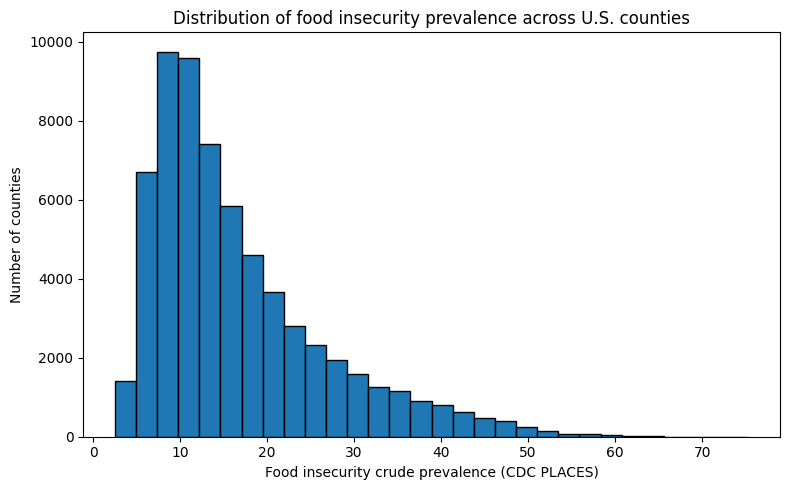

In [47]:
plt.figure(figsize=(8, 5))
plt.hist(target_df['food_insecurity_rate'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Food insecurity crude prevalence (CDC PLACES)')
plt.ylabel('Number of counties')
plt.title('Distribution of food insecurity prevalence across U.S. counties')
plt.tight_layout()
plt.show()


The histogram shows that food insecurity rates are heavily right-skewed with most census tracts falling between 5–20% and a smaller number experiencing much higher levels. This pattern indicates that while food insecurity is generally moderate across the country, a subset of communities faces extreme hardship.

Now I'll summarize county-level food access indicators from the USDA Food Access Atlas. By aggregating tracts to the county level, I examine how common it is for residents to live far from supermarkets and how often this overlaps with low income or lack of vehicle access. These indicators describe barriers that may contribute to food insecurity.


In [48]:
# Summary statistics for key county-level food access rates
fa_county[['low_access_rate_county',
           'low_income_low_access_rate_county',
           'no_vehicle_low_access_rate_county']].describe()


,low_access_rate_county,low_income_low_access_rate_county,no_vehicle_low_access_rate_county
count,3142.000000,3142.000000,3142.000000
mean,0.642301,0.223092,0.012149
std,0.195047,0.108697,0.010575
min,0.000000,0.000000,0.000000
25%,0.518202,0.142653,0.006275
50%,0.658793,0.209274,0.010071
75%,0.782370,0.295790,0.015252
max,1.000000,0.676394,0.182296


These county-level statistics show that physical food access barriers are widespread across the America. There is an average of 64% of residents living far from a supermarket and 22% facing both low income and low access. The large variation highlights unequal structural conditions. The small numbere of residents who are low-access and lack vehicle transportation points to disadvantages that can make obtaining food especially difficult.



Now, to directly relate access to outcomes, I merge the county-level food access data with the CDC food insecurity rates and create a scatterplot of low-access rate versus food insecurity rate. This plot helps assess whether counties where a larger share of residents live far from supermarkets also tend to have higher food insecurity prevalence.


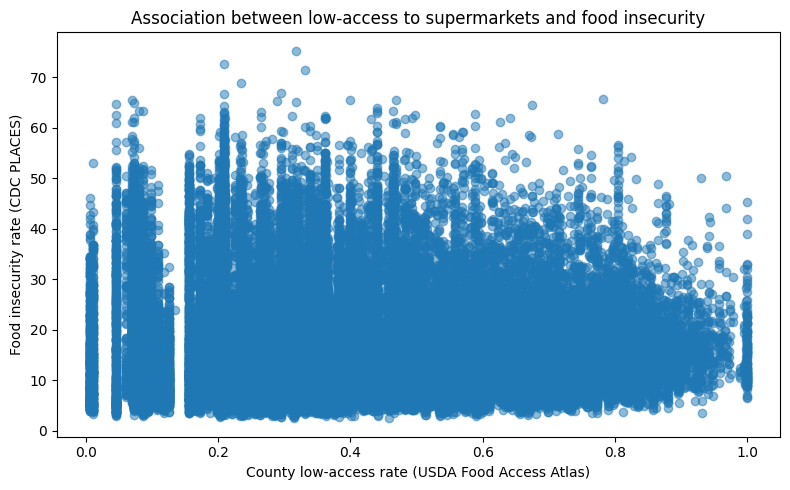

In [49]:
# Merge USDA county food access data with CDC food insecurity outcome
fa_target = fa_county.merge(
    target_df[['FIPS', 'food_insecurity_rate']],
    left_on='county_fips',
    right_on='FIPS',
    how='inner'
)

# make a scatterplot for low-access rate vs food insecurity rate
plt.figure(figsize=(8, 5))
plt.scatter(fa_target['low_access_rate_county'],
            fa_target['food_insecurity_rate'],
            alpha=0.5)
plt.xlabel('County low-access rate (USDA Food Access Atlas)')
plt.ylabel('Food insecurity rate (CDC PLACES)')
plt.title('Association between low-access to supermarkets and food insecurity')
plt.tight_layout()
plt.show()


This scatterplot shows a generally positive but noisy relationship between county-level low-access rates and food insecurity. Counties with higher food insecurity have higher shares of residents living far from supermarkets, suggesting that physical access plays an important role. However, the wide vertical spread at nearly every access level indicates that supermarket distance alone does not fully explain food insecurity—other socioeconomic factors, such as poverty and transportation barriers, also contribute. Overall, the plot highlights that food insecurity is shaped by multiple intersecting structural conditions.

Next, I use the USDA Food Environment Atlas by merging it with the CDC PLACES data at the county level. I group counties by `METRO23` (metro status category) and compare the mean and median food insecurity rate across these groups. This analysis shows whether food insecurity levels differ systematically between metro and non-metro counties.


In [50]:
# Make sure FIPS is a zero-padded string in the Food Environment Atlas subset
fe_fixed = fe.copy()
fe_fixed['FIPS'] = fe_fixed['FIPS'].astype(str).str.zfill(5)

# Merge Food Environment Atlas with CDC PLACES outcome
fe_target = fe_fixed.merge(
    target_df[['FIPS', 'food_insecurity_rate']],
    on='FIPS',
    how='inner'
)

# Group by metro status and compute summary statistics
metro_group = fe_target.groupby('METRO23')['food_insecurity_rate'].agg(
    count='count',
    mean='mean',
    median='median'
).reset_index()

metro_group



,METRO23,count,mean,median
0,0,10657,16.419377,14.5
1,1,53230,16.673383,13.4


The comparison of food insecurity by metro status shows that urban and rural counties have nearly identical average food insecurity rates. This very small difference, also reflected in the bar chart below, suggests that food insecurity is not primarily an urban or rural issue but a widespread national challenge. The finding indicates that metro status alone is not a strong predictor of food insecurity, highlighting the need to consider additional socioeconomic factors to understand why some counties experience higher rates than others.

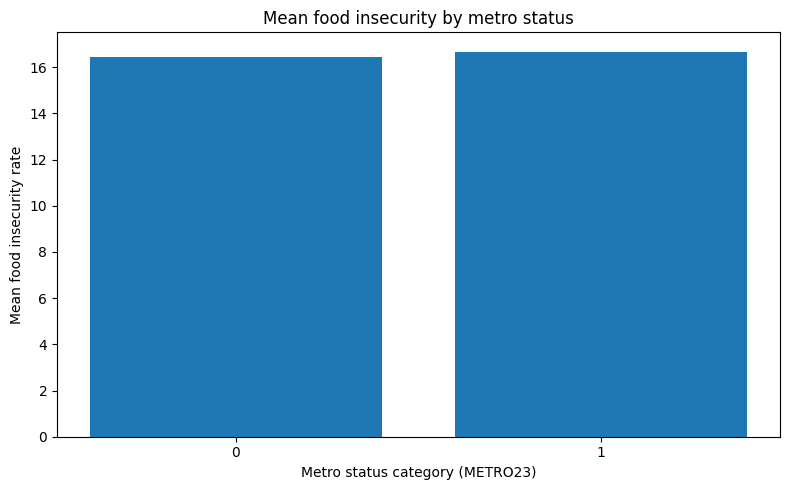

In [51]:
plt.figure(figsize=(8, 5))
plt.bar(metro_group['METRO23'].astype(str),
        metro_group['mean'])
plt.xlabel('Metro status category (METRO23)')
plt.ylabel('Mean food insecurity rate')
plt.title('Mean food insecurity by metro status')
plt.tight_layout()
plt.show()


Finally, I examine how food insecurity varies across different county poverty levels. Using the county poverty rate (`POVRATE21`) from the Food Environment Atlas, I create poverty bins and compute the mean and median food insecurity rate in each bin. This grouped summary shows how strongly food insecurity aligns with higher county poverty.


In [52]:
# Ensure the poverty variable exists and drop missing values
fe_target_pov = fe_target.dropna(subset=['POVRATE21', 'food_insecurity_rate']).copy()

# Define poverty-rate bins
bins = [0, 10, 20, 30, 100]
labels = ['<10%', '10–20%', '20–30%', '≥30%']

fe_target_pov['poverty_bin'] = pd.cut(
    fe_target_pov['POVRATE21'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Group by poverty bin and summarize food insecurity
poverty_summary = fe_target_pov.groupby('poverty_bin')['food_insecurity_rate'].agg(
    count='count',
    mean='mean',
    median='median'
).reset_index()

poverty_summary


/tmp/ipython-input-457703230.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  poverty_summary = fe_target_pov.groupby('poverty_bin')['food_insecurity_rate'].agg(


,poverty_bin,count,mean,median
0,<10%,16302,11.398601,9.8
1,10–20%,42493,17.764780,14.9
2,20–30%,3942,25.340411,23.4
3,≥30%,274,30.792336,29.5


The analysis of food insecurity across county poverty levels shows a strong, consistent upward trend. Counties with higher poverty rates experience significantly higher food insecurity. Food insecurity rises from about 11% in low-poverty counties to over 30% in counties where poverty exceeds 30%. This is the clearest pattern in the EDA and highlights poverty as a major structural driver of food insecurity.

# Model Questions
1. A first modeling approach is to predict county-level food insecurity rates using structural food-access and socioeconomic variables. The dependent variable is the CDC PLACES food insecurity rate, and the independent variables include supermarket low-access rates, low-income low-access rates, and no-vehicle low-access rates from the USDA Food Access Atlas, along with poverty rate, median household income, demographic composition, and metro status from the Food Environment Atlas. The EDA strongly supports this model since food insecurity rises with poverty and shows moderate associations with supermarket access barriers, and appears relatively stable across metro classifications. A multiple linear regression would allow me to quantify how each predictor contributes to food insecurity and assess how well these structural conditions explain geographic variation in the outcome.
2. A second modeling direction is to turn the problem into a classification task by identifying counties with “high” food insecurity, defined as rates at or above 20%. The dependent variable becomes binary (high vs. low food insecurity), while the independent variables remain poverty indicators, access metrics, demographic characteristics, and metro status. The EDA results provide strong justification for doing this since the histogram shows a distinct right-skewed distribution with some counties experiencing much higher food insecurity.